In [1]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential

# Read in images

In [2]:
IMG_HEIGHT = IMG_WIDTH = 32
BATCH_SIZE = 32


np.random.seed(42)
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 52s 0us/step


In [3]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Validation images shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 1)


# Image Visualization

In [4]:
data_dict = {0 : "Airplane",
             1 : "Car",
             2 : "Bird",
             3 : "Cat",
             4 : "Deer",
             5 : "Dog",
             6 : "Frog",
             7 : "Horse",
             8 : "Ship",
             9 : "Truck",
            }

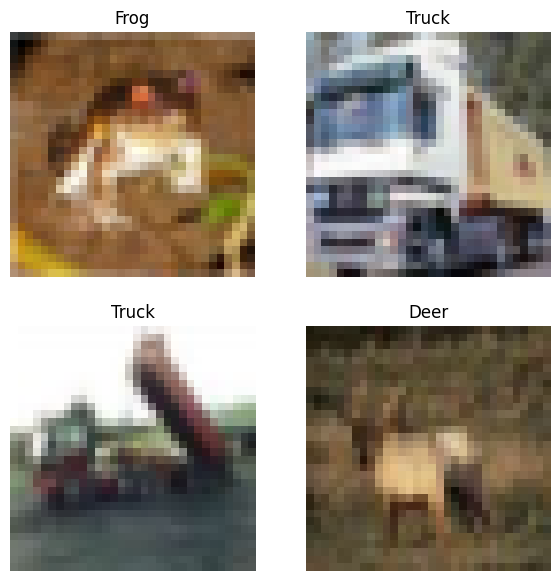

In [5]:
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(train_images[i].astype('uint8'))
    plt.title(data_dict[int(train_labels[i])])
    plt.axis("off")


# Preprocessing

## Normalization

In [6]:
train_images = train_images.astype('float32') / 255
val_images = val_images.astype('float32') / 255

## One-hot Encoding

In [7]:
train_labels = keras.utils.to_categorical(train_labels, 10)
val_labels = keras.utils.to_categorical(val_labels, 10)

## Creating dataset objects

In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(buffer_size=len(train_images))
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_ds = val_ds.batch(BATCH_SIZE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# NN

In [9]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [12]:
EPOCHS = 25
history = model.fit(train_ds,
                    validation_data=val_ds, 
                    epochs=EPOCHS,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Epoch 1/25
1563/1563 [==============================] - 13s 4ms/step - loss: 2.1414 - accuracy: 0.2842 - val_loss: 1.8764 - val_accuracy: 0.3607
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8837 - accuracy: 0.3521 - val_loss: 1.8540 - val_accuracy: 0.3569
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8341 - accuracy: 0.3706 - val_loss: 1.8710 - val_accuracy: 0.3532


## Accuracy and Loss Graph

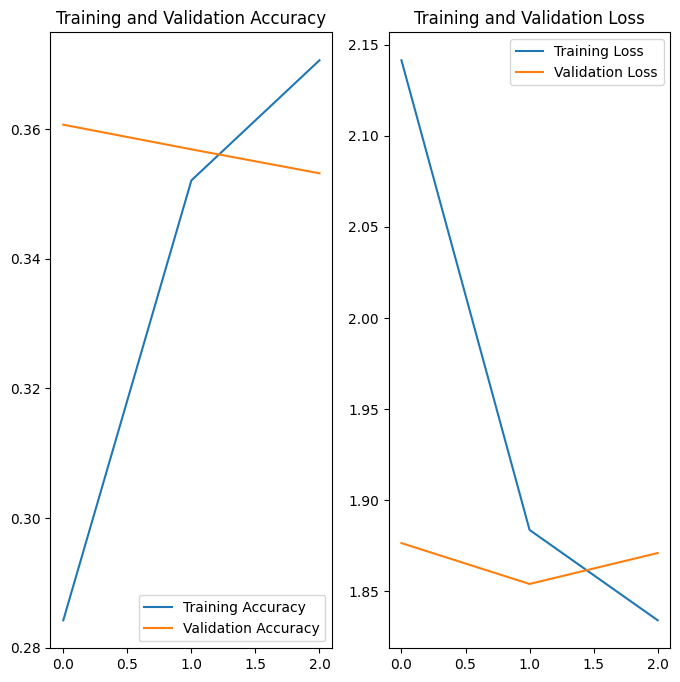

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# CNN

In [14]:
model_cnn = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.GlobalMaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')       
])

In [18]:
model_cnn.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

In [19]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 6, 6, 64)         

In [20]:
EPOCHS = 20
history_cnn = model_cnn.fit(train_ds,
                            validation_data=val_ds, 
                            epochs=EPOCHS,
                            callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Epoch 1/20
1563/1563 [==============================] - 20s 10ms/step - loss: 1.7395 - accuracy: 0.3411 - val_loss: 1.4320 - val_accuracy: 0.4608
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4423 - accuracy: 0.4718 - val_loss: 1.3191 - val_accuracy: 0.5245
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3253 - accuracy: 0.5216 - val_loss: 1.2327 - val_accuracy: 0.5593
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2647 - accuracy: 0.5464 - val_loss: 1.1379 - val_accuracy: 0.5883
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2166 - accuracy: 0.5663 - val_loss: 1.1245 - val_accuracy: 0.6078
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1751 - accuracy: 0.5831 - val_loss: 1.0919 - val_accuracy: 0.6111
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1421 - accuracy: 0.5982 - val_loss: 1.0126 - val_ac

## Accuracy and Loss Graph

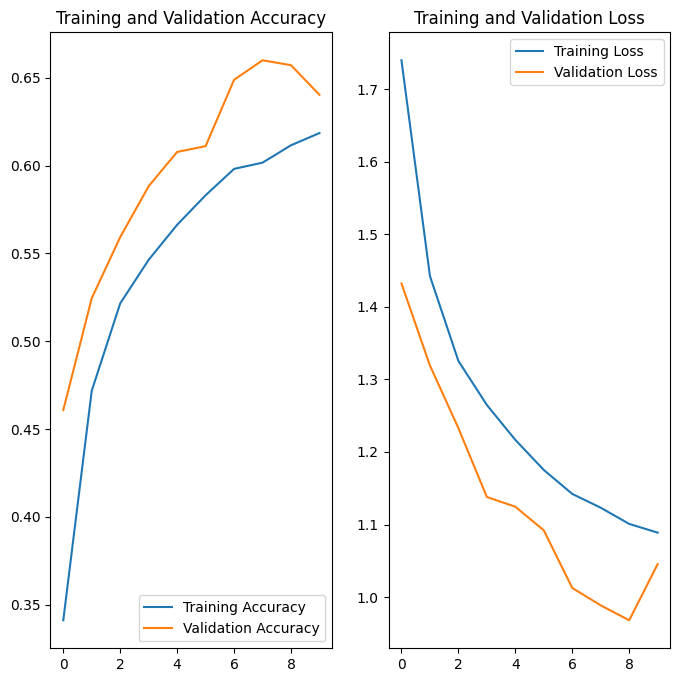

In [21]:
acc_cnn = history_cnn.history['accuracy']
val_acc_cnn = history_cnn.history['val_accuracy']

loss_cnn = history_cnn.history['loss']
val_loss_cnn = history_cnn.history['val_loss']

epochs_range = range(len(loss_cnn))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_cnn, label='Training Accuracy')
plt.plot(epochs_range, val_acc_cnn, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_cnn, label='Training Loss')
plt.plot(epochs_range, val_loss_cnn, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Data Augmentation

In [22]:
data_augmentation = Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.1)    
])

In [23]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

In [24]:
model_cnn_aug = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.GlobalMaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')       
])

In [25]:
model_cnn_aug.compile(optimizer='adam',
                      loss=tf.keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])

In [26]:
model_cnn_aug.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 6, 6, 64)         

In [28]:
EPOCHS = 20
history_cnn_aug = model_cnn_aug.fit(train_ds,
                                validation_data=val_ds, 
                                epochs=EPOCHS,
                                callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Epoch 1/20
1563/1563 [==============================] - 20s 11ms/step - loss: 1.8553 - accuracy: 0.3021 - val_loss: 1.6116 - val_accuracy: 0.4007
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5968 - accuracy: 0.4194 - val_loss: 1.4066 - val_accuracy: 0.4797
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5191 - accuracy: 0.4469 - val_loss: 1.3338 - val_accuracy: 0.5112
Epoch 4/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4660 - accuracy: 0.4711 - val_loss: 1.2909 - val_accuracy: 0.5351
Epoch 5/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4276 - accuracy: 0.4881 - val_loss: 1.2409 - val_accuracy: 0.5488
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4065 - accuracy: 0.4953 - val_loss: 1.3019 - val_accuracy: 0.5310


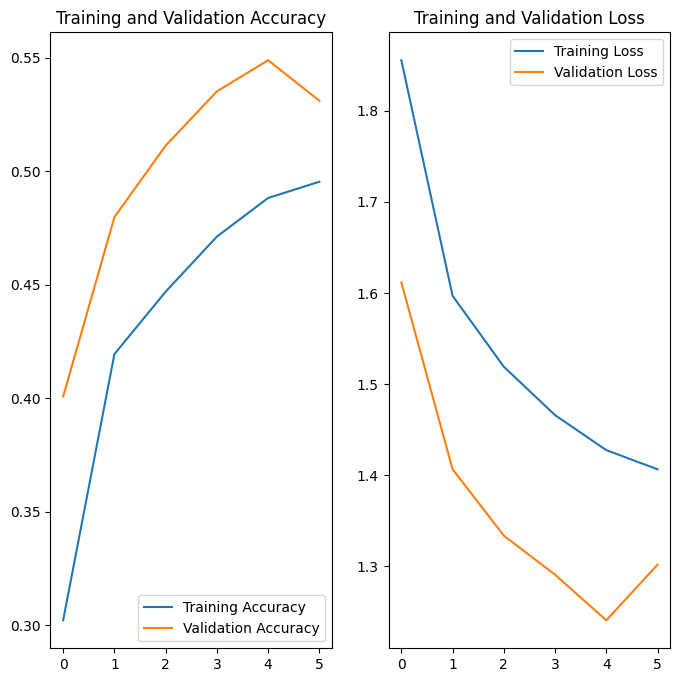

In [30]:
acc_cnn_aug = history_cnn_aug.history['accuracy']
val_acc_cnn_aug = history_cnn_aug.history['val_accuracy']

loss_cnn_aug = history_cnn_aug.history['loss']
val_loss_cnn_aug = history_cnn_aug.history['val_loss']

epochs_range = range(len(loss_cnn_aug))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_cnn_aug, label='Training Accuracy')
plt.plot(epochs_range, val_acc_cnn_aug, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_cnn_aug, label='Training Loss')
plt.plot(epochs_range, val_loss_cnn_aug, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()